In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "/Users/michelebowman/source/Resources/Matplotlib/city_data.csv"
ride_data_to_load = "/Users/michelebowman/source/Resources/Matplotlib/ride_data.csv"


# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
#city_data_df.head()

ride_data_df = pd.read_csv(ride_data_to_load)
#ride_data_df.head()


# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')

# Display the data table for preview
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
#Calculate the average fare, total # of rides and total number of drivers per city for bubble plot
#Set dataframes for each type (Urban, Suburban, Rural)
# Obtain the x and y coordinates for each of the three city types
Urban_df = combined_df.loc[combined_df["type"]=="Urban"]
UrbanTotalRide = Urban_df.groupby("city")["ride_id"].count()
UrbanAvgFare = Urban_df.groupby("city")["fare"].mean()
UrbanDriverCount = Urban_df.groupby("city")["driver_count"].mean()

Suburban_df = combined_df.loc[combined_df["type"]=="Suburban"]
SuburbanTotalRide = Suburban_df.groupby("city")["ride_id"].count()
SuburbanAvgFare = Suburban_df.groupby("city")["fare"].mean()
SuburbanDriverCount = Suburban_df.groupby("city")["driver_count"].mean()

rural_df = combined_df.loc[combined_df["type"]=="Rural"]
RuralTotalRide = rural_df.groupby("city")["ride_id"].count()
RuralAvgFare = rural_df.groupby("city")["fare"].mean()
RuralDriverCount = rural_df.groupby("city")["driver_count"].mean()

#UrbanDriverCount.head()

## Bubble Plot of Ride Sharing Data

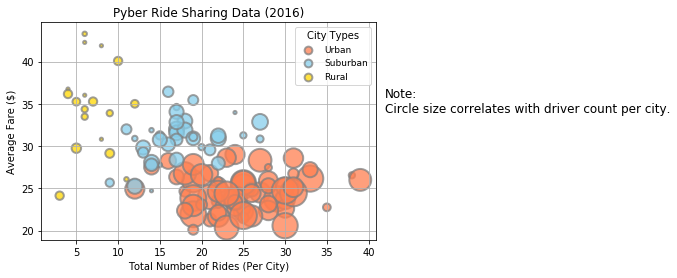

In [23]:
# Build the scatter plots for each city types, Incorporate the other graph properties
plt.scatter(UrbanTotalRide, UrbanAvgFare, marker = "o", facecolors="Coral", edgecolors="grey", linewidth=2, label = 'Urban',
                    s=UrbanDriverCount*10, alpha=.75)
            
plt.scatter(SuburbanTotalRide, SuburbanAvgFare, marker = "o", facecolors="SkyBlue", edgecolors="grey", linewidth=2, label = 'Suburban',
                    s=SuburbanDriverCount*10, alpha=.75)

plt.scatter(RuralTotalRide, RuralAvgFare, marker = "o", facecolors="Gold", edgecolors="grey", linewidth=2, label = 'Rural',
                    s=RuralDriverCount*10, alpha=.75)
plt.grid()

# Create a legend
legend = plt.legend(title = "City Types", loc='best', fontsize = '9')
legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]
plt.title ("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(42,34, "Note:\nCircle size correlates with driver count per city.", fontsize = 12)

# Save Figure
plt.savefig("/Users/michelebowman/source/Resources/Matplotlib/pyber.png")

In [24]:
# Show plot
plt.show()

## Total Fares by City Type

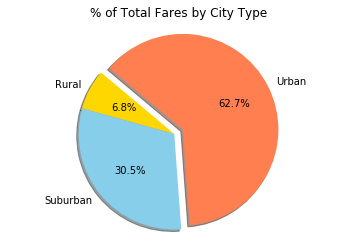

In [31]:
# Calculate Type Percents
UrbanFare = Urban_df["fare"].sum()
UrbanFare

SuburbanFare = Suburban_df["fare"].sum()
SuburbanFare

RuralFare = rural_df["fare"].sum()
RuralFare

TotalFare = combined_df["fare"].sum()
TotalFare

#Creat labels, values, colors and explode parameters for the fare's pie chart
labels = ["Rural", "Suburban", "Urban"]
fares = [4327.93, 19356.33, 39854.38]
colors = ["Gold", "SkyBlue", "Coral"]
explode = [0, 0, 0.1]
# Build Pie Chart
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct ="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("/Users/michelebowman/source/Resources/Matplotlib/totalfares.png")

In [26]:
# Show Figure
plt.show()

## Total Rides by City Type

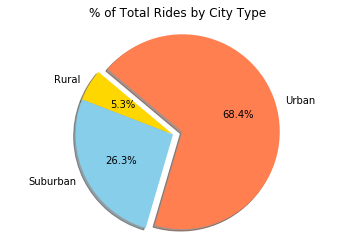

In [32]:
# Calculate Ride Percents
#UrbanRide = Urban_df["ride_id"].count()
#UrbanRide

#SuburbanRide = Suburban_df["ride_id"].count()
#SuburbanRide

#RuralRide = rural_df["ride_id"].count()
#RuralRide

#TotalRide = combined_df["ride_id"].count()
#TotalRide

#Creat labels, values, colors and explode parameters for the fare's pie chart
labels = ["Rural", "Suburban", "Urban"]
fares = [125, 625, 1625]
colors = ["Gold", "SkyBlue", "Coral"]
explode = [0, 0, 0.1]
# Build Pie Chart
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct ="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")


# Save Figure
# Save Figure
plt.savefig("/Users/michelebowman/source/Resources/Matplotlib/totalrides.png")

In [28]:
# Show Figure
#plt.show()

## Total Drivers by City Type

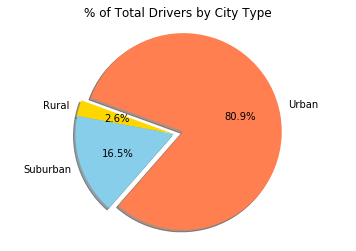

In [33]:
# Calculate Driver Percents

cdtd = city_data_df.groupby("type")
cdsum = cdtd["driver_count"].sum()
cdsum

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
fares = [78, 490, 2405]
colors = ["Gold", "SkyBlue", "Coral"]
explode = [0, 0, 0.1]
# Build Pie Chart
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct ="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
# Save Figure
# Save Figure
plt.savefig("/Users/michelebowman/source/Resources/Matplotlib/totaldrivers.png")

In [34]:
# Show Figure
#plt.show()